In [185]:
import numpy as np
from scipy.special import ellipk, ellipe
import matplotlib.pyplot as plt

In [186]:
def magnetic_field_inside_solenoid(x, y, z, N, d, R, I):
    # Permeability of free space (constant)
    mu_0 = 4 * np.pi * 1e-7
    
    # Initialize the total magnetic field components
    Bx = 0.0
    By = 0.0
    Bz = 0.0
    
    # Loop through the current loops in the solenoid
    for n in range(N):
        # Calculate the position of the current loop
        theta = 2 * np.pi * n / N
        x_loop = R * np.cos(theta)
        y_loop = R * np.sin(theta)
        
        # Calculate the position vector from the current loop to the point (x, y, z)
        rx = x - x_loop
        ry = y - y_loop
        rz = z
        
        # Calculate the magnitude of the position vector
        r = np.sqrt(rx**2 + ry**2 + rz**2)+1e-20
        
        # Avoid division by zero
        if r < 1e-24:
            continue
        
        # Calculate the elliptic integrals
        k = 4 * R * np.sqrt(rx**2 + ry**2) / ((R + d)**2 + rz**2)
        K = ellipk(k)
        E = ellipe(k)
        
        # Calculate the magnetic field components from the current loop
        Bx_loop = (mu_0 * I / (4 * np.pi)) * (rz / r) * (K + (R**2 - (d**2 + rz**2)) * E / ((R - d)**2 + rz**2))
        By_loop = 0  # Magnetic field in the y-direction is zero for a solenoid
        Bz_loop = (mu_0 * I / (4 * np.pi)) * (1 - (R**2 - (d**2 + rz**2)) * E / ((R - d)**2 + rz**2))
        
        # Add the contributions from the current loop to the total magnetic field
        Bx += Bx_loop
        By += By_loop
        Bz += Bz_loop
    
    return Bx*10**4, By*10**4, Bz*10**4

In [193]:
# Input parameters
N = 50  # Number of turns
d = 0.0025  # Gap between turns (in meters)
R = 0.06  # Radius of the solenoid (in meters)
I = 1.0  # Current through the solenoid (in Amperes)
x = 0.0  # x-coordinate of the point of interest (inside the solenoid)
y = 0.0  # y-coordinate of the point of interest (inside the solenoid)
z = 0.005  # z-coordinate of the point of interest (inside the solenoid)


In [188]:
# Calculate the magnetic field components inside the solenoid
Bx, By, Bz = magnetic_field_inside_solenoid(x, y, z, N, d, R, I)

# Print the results
print(f"Magnetic field inside the solenoid (x-direction): {Bx} Tesla")
print(f"Magnetic field inside the solenoid (y-direction): {By} Tesla")
print(f"Magnetic field inside the solenoid (z-direction): {Bz} Tesla")

Magnetic field inside the solenoid (x-direction): nan Tesla
Magnetic field inside the solenoid (y-direction): 0.0 Tesla
Magnetic field inside the solenoid (z-direction): nan Tesla


In [189]:
# Input parameters
N = 40 # Number of turns
d = 0.0025 # Gap between turns (in meters)
R = 0.1 # Radius of the solenoid (in meters)
I = 1.0  # Current through the solenoid (in Amperes)
xr=0.14
x = np.linspace(-xr,xr,1000) # x-coordinate of the point of interest (inside the solenoid)
y = 0.0  # y-coordinate of the point of interest (inside the solenoid)
z = 0.01 # z-coordinate of the point of interest (inside the solenoid)

In [190]:
bx,by,bz,b=[],[],[],[]

In [191]:
for i in range(0,len(x)):
    b1,b2,b3= magnetic_field_inside_solenoid(x[i], y, z, N, d, R, I)
    #print(b1,b2,b3)
    bx.append(b1)
    by.append(b2)
    bz.append(b3)
    b4=(np.sqrt(b1**2+b2**2+b3**2))
    #print(b4)
    b.append(b4)


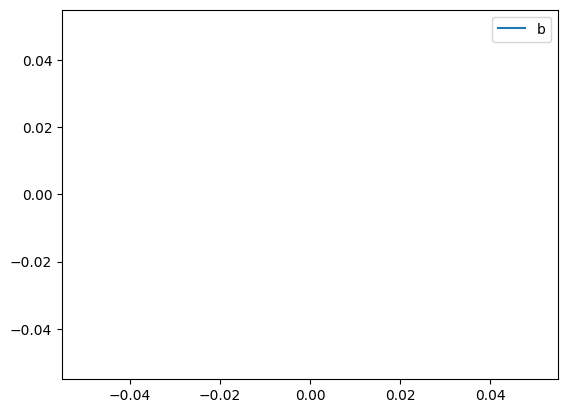

In [192]:
plt.plot(x,b,label="b")
#plt.plot(x,bz,label="bz")
#plt.plot(x,bx,label="bx")
plt.legend()
#plt.yticks(np.arange(0.00,0.05,0.002))
#0.002G is the fluctuation in the 